### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [142]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

#Import the necessary libraries
import matplotlib
from math import sqrt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
#Scale dataset to make points closer together
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')  

# View the DataFrame, top 5 rows
reviews.head()


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [144]:
# View bottom 5 rows of the DataFrame
reviews.tail()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars
1999,Male,32,92.66,8,479,PhD,EN,Web,453,This game is fun. A lot like scrabble without ...,Love this game


Get a sense of the data.  From the output we can tell that the data makes sense, the columns contain numerical and categorical data as expected. The column names are self-explanatory but should be checked.

In [145]:
# Check missing data for cases
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

***Interpretation*** There is no missing data.

In [146]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


***Interpretation*** 
- There are 2000 rows
- 11 columns
- no missing data confirmed
- 3 data types

In [147]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


***Interpretation***
- product can be ignored since it looks like product ID's
- Min & Max all columns expect products look fine



In [148]:
# Find unique values relevant catagorical columns
reviews_cat = reviews.select_dtypes(include=['object'])
reviews_cat = reviews_cat.loc[:, reviews_cat.columns != 'review']
reviews_cat = reviews_cat.loc[:, reviews_cat.columns != 'summary']
for col in reviews_cat:
    print(reviews_cat[col].name)
    print(reviews_cat[col].unique())

gender
['Male' 'Female']
education
['graduate' 'PhD' 'diploma' 'postgraduate' 'Basic']
language
['EN']
platform
['Web']


## 2. Drop columns

In [149]:
# Drop unnecessary columns.
reviews.drop(columns=['language','platform'], axis = 1, inplace=True)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [150]:
# Rename the column headers.

reviews.rename(columns = {'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'},
               inplace = True)

# View column names to check names changed correctly
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [151]:
# Create a CSV file as output.
reviews.to_csv("reviews_clean.csv", index = False)

In [152]:
# Import new CSV file with Pandas.

new_reviews = pd.read_csv('reviews_clean.csv')
# View DataFrame.
print(new_reviews.shape)
new_reviews.head()

(2000, 9)


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [153]:
# Create DataFrame with relevant columns
spend_loyalty = new_reviews[['spending_score', 'loyalty_points']]
spend_loyalty.head()



,spending_score,loyalty_points
0,39,210
1,81,524
2,6,40
3,77,562
4,40,366


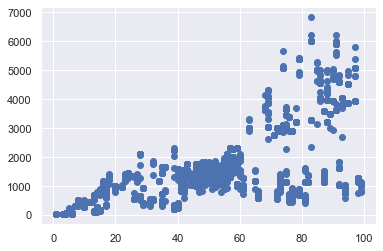

In [154]:
# Independent variable.
x = spend_loyalty['spending_score']

# Dependent variable.
y =  spend_loyalty['loyalty_points']

# Check for linearity.
plt.scatter(x,y)

In [155]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = spend_loyalty).fit()

# Print the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        12:45:36   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


 - The coefficient of the variable is negative which means that they have an inverse relationship.  In this example it means that for an increase of one unit in spend loyalty points decrease y 75 points
 - the values of 31.464 and 34.659 mean that if a random sample of a hundred was taken they would fall within this range 97.5% of the time (@Norah is this true. in the example on Yellowdig they said 95% of the time, but not sure where the 95%  comes from in this specific example.
 - The t-value indicates if the 
 
 <table>
  <tr>
    <th>Detail</th>
    <th>Meaning</th>
    <th>Specific Interpretation</th>
  </tr>
  <tr>
    <td>$R^{2}$ </td>
    <td>"R-sq describes how much of the total variation in the data is explained by this regression model. It takes values from 0% to 100%, and the higher it is the better." </td>
    <td><li>45% which means that the relationship between the variables explains 45% of the variation in the data.  If it was 1% it would only account for 1% of the the variation in the data so we can "ignore it".</li>
        <li>since we don't have anything to compare with we don't know wether this is good or bad</li>
        <li>another way of saying it is that 45% of the total variablity (loyalty points) was explained by the variability of spending score.</li>
    </td>
  </tr>
  <tr>
    <td>F-statistic</td>
    <td>answers the question wheter overall, the explanatory variables of the regression model are significant therefor useful for multivariate analysis.</td>
    <td>N/Q</td>
  </tr>
    <tr>
    <td>probability of f-statistic</td>
    <td>if the probabability of **f-stat** is less than the threshold, in this case 5% then **the variables of the regression model are significant**, in other words good.</td>
    <td>Norah? How to read: Prob (F-statistic):	2.43e-209</td>
  </tr>
    <tr>
    <td></td>
    <td></td>
    <td></td>
  </tr>
     <tr>
    <td></td>
    <td></td>
    <td></td>
  </tr>
</table>

In [156]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [157]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 33.061693 * spend_loyalty['spending_score'] - 0.814419

# View the output.
y_pred

0       1288.591608
1       2677.182714
2        197.555739
3       2544.935942
4       1321.653301
           ...     
1995    2280.442398
1996     263.679125
1997    3007.799644
1998     528.172669
1999     263.679125
Name: spending_score, Length: 2000, dtype: float64

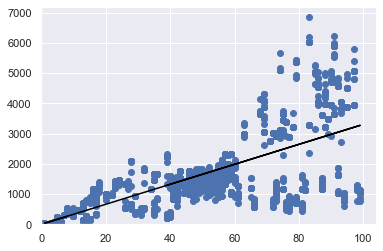

In [158]:
import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)

# Plot the regression line(in black)
plt.plot(x,y_pred, color ='black')

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()


### Summary

The best model only had an R-sq value of 45% which means that the 

**Further Investigation**
- Dig into the data to find out reasons for lower correlation
    - Find out more about the loyalty points in this data, are these points that have been issued or redeemed?
    

### 5b) renumeration vs loyalty

   remuneration  loyalty_points
0         12.30             210
1         12.30             524
2         13.12              40
3         13.12             562
4         13.94             366


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        12:45:39   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

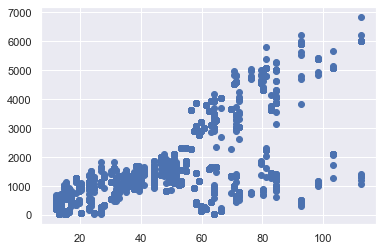

In [159]:
# Create DataFrame with relevant columns
remuneration_loyalty = new_reviews[['remuneration', 'loyalty_points']]
print(remuneration_loyalty.head())

# Independent variable.
x = remuneration_loyalty['remuneration']


# Dependent variable.
y = remuneration_loyalty['loyalty_points']

# Check for linearity.
plt.scatter(x,y)

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = remuneration_loyalty).fit()

# Print the regression table
test.summary()

### Inerpretation of Regression Results
- Loyalty_points (Y) is the dependent variable = intercept in summary table when independent (explanatory variables) are zero.
- renumeration is the independent variable / explanatory variable
- The coefficient of the variable is negative which means that they have an inverse relationship.  In this example it means that as salaries increase, loyalty points decrease and more specifically for every unit (assume $1) increase in remuneration there is a decrease of 65 points.





In [160]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standared errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())


Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standared errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [161]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 34.187825 * remuneration_loyalty['remuneration'] - 0.977925

# View the output.
y_pred


0        419.532322
1        419.532322
2        447.566339
3        447.566339
4        475.600355
           ...     
1995    2886.525774
1996    3166.865939
1997    3166.865939
1998    3363.104055
1999    3166.865939
Name: remuneration, Length: 2000, dtype: float64

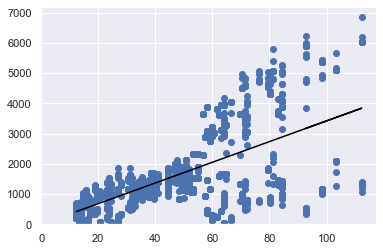

In [162]:
import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)

# Plot the regression line(in black)
plt.plot(x,y_pred, color ='black')

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()



### Summary

renumeration vs loyalty and spending vs loyalty have a similar pattern in that there is a stronger correlation between the two up until 60 loyalty points. 38% of the changes are accounted for in the data.

### 5c) age vs loyalty

In [163]:
age_loyalty = new_reviews[['age','loyalty_points']]

# Independent variable.
x = age_loyalty['age']

# Dependent variable.
y = age_loyalty['loyalty_points']

# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = age_loyalty).fit()

# Print the regression table
test.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 12 Sep 2022   Prob (F-statistic):             0.0577
Time:                        12:45:42   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standared errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standared errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [165]:
# Set the X coefficient and the constant to generate the regression table.
y_pred =  -4.012805 * age_loyalty['age'] -  2.113177

# View the output.
y_pred

0       -74.343667
1       -94.407692
2       -90.394887
3      -102.433302
4      -134.535742
           ...    
1995   -150.586962
1996   -174.663792
1997   -138.548547
1998   -138.548547
1999   -130.522937
Name: age, Length: 2000, dtype: float64

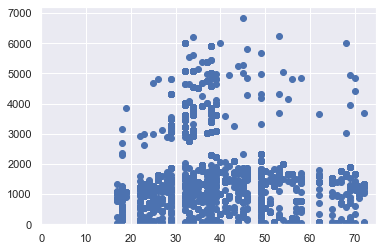

In [166]:
# Plot graph with regression line.
import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)

# Plot the regression line(in black)
plt.plot(x,y_pred, color ='black')

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

## Exploratory Data Analysis
Exploratory analysis should be done on the training data set, because from it we can learn

<AxesSubplot:>

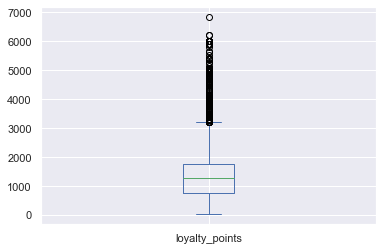

In [167]:
# Sometimes the best way to see is to plot. 
# In the data sampled here many of the values are 0
# There are less negative values than positive but the negative values are highly negative.

%matplotlib inline
import matplotlib.pyplot as plt

# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = new_reviews.reset_index()['loyalty_points'].sort_values()
_plot.plot(kind='box')


<AxesSubplot:>

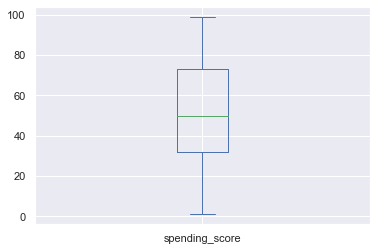

In [168]:
_plot = new_reviews.reset_index()['spending_score'].sort_values()
_plot.plot(kind='box')

<AxesSubplot:>

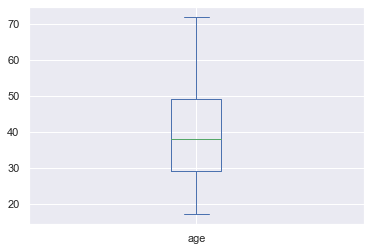

In [169]:
_plot = new_reviews.reset_index()['age'].sort_values()
_plot.plot(kind='box')

<AxesSubplot:>

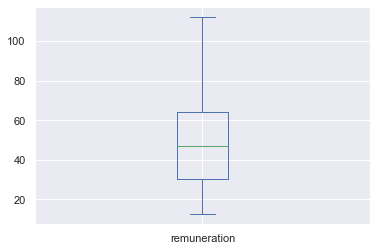

In [170]:
_plot = new_reviews.reset_index()['remuneration'].sort_values()
_plot.plot(kind='box')

***Boxplots indicate that there are no outliers for the dependanat variables

### Split dependant coloumn and independent columns into separate dataframes.

In [171]:
# Create a dataframe with the features (independent variables)
new_reviews_features = new_reviews[['age','remuneration','spending_score']]
new_reviews_features.head()

,age,remuneration,spending_score
0,18,12.30,39
1,23,12.30,81
2,22,13.12,6
3,25,13.12,77
4,33,13.94,40


In [172]:
# Create a dataframe with the dependent variable (target variable)
new_reviews_target = new_reviews['loyalty_points']
new_reviews_target.head()

0    210
1    524
2     40
3    562
4    366
Name: loyalty_points, dtype: int64

In [173]:
# Split the data into training = 0.7 and testing = 0.3 subsets.
X_train, X_test, y_train, y_test = train_test_split(new_reviews_features, new_reviews_target,
                                                    test_size=0.3,
                                                    random_state=6738)

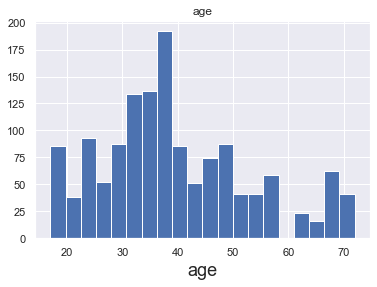

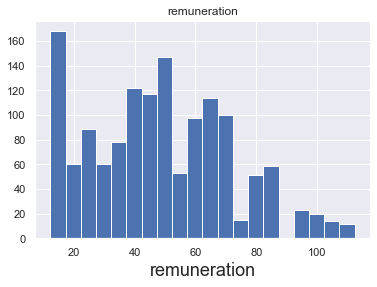

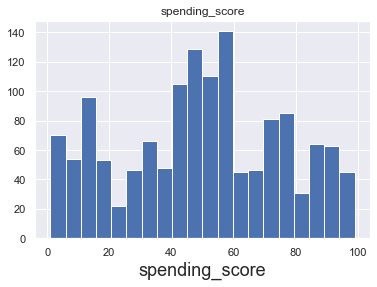

In [174]:
# Create a histogram of the features (independent variables)
for feature in new_reviews_features:
    X_train.hist(column =feature, bins = 20)
    plt.xlabel(feature, fontsize=18)
    plt.show()

<AxesSubplot:>

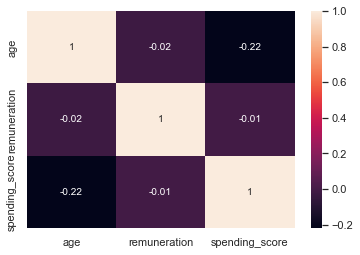

In [175]:
# Create a correlation matrix of the features
correlation_matrix = X_train.corr().round(2)
# annot = True to print values in the square
sns.heatmap(data=correlation_matrix, annot=True)

There are a positive and negative correlations between the independent variables.  So, need to check the variance inflation factor on the training dataset.

### 5. Check For Multicollinearity

In [176]:
p=X_train.shape[1]
print(p)
vif = [variance_inflation_factor(X_train.values, i) for i in range(p)]
vif = pd.Series(vif, index=X_train.columns)
print(vif)

3
age               4.276542
remuneration      4.159631
spending_score    3.229608
dtype: float64


**Interpretation**
A VIF over 4 indicates multicollinearity may exist which is the reason to use ridge regression which will keep all the features but reduce the magnitude of the coefficients of the model.


In [177]:
# Split the data into training = 0.7 and testing = 0.3 subsets.
X_train, X_test, y_train, y_test = train_test_split(new_reviews_features, new_reviews_target,
                                                    test_size=0.3,
                                                    random_state=6738)

X_train.head()

,age,remuneration,spending_score
757,32,63.96,78
1602,22,32.80,47
895,26,49.20,52
899,22,50.02,49
113,18,52.48,46


In [178]:
#### Create baseline of target value
y_pred = y_train.mean()
print(y_pred)


1576.0585714285714


### Create a baseline model to compare accuracy

In [179]:
len(y_test)

600

In [180]:
y_pred2 = [y_pred] * len(y_train)
len(y_pred2)


1400

In [181]:
# Use regression metrics to evaluate the model

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [182]:
# Mean absolute error for Training data

mean_abs_e = mean_absolute_error(y_train, y_pred2)


mean_abs_e


927.809406122449

Our mean absolute error is 927 so we hope that subsequent models will have a lower mean absolute error

In [183]:
# Mean squared error for Training data

mean_sqrd = mean_squared_error(y_train, y_pred2)
mean_sqrd


1634536.4237122447

In [184]:
# Prediction variable for y_test

y_pred3 = [y_pred] * len(y_test)

# Mean absolute error for Test data

mae = mean_absolute_error(y_test, y_pred3)

# Mean squared error for test data
mse = mean_squared_error(y_test, y_pred3)

print(f"mae: {mae} \nmse: {mse}")



mae: 916.3777523809524 
mse: 1672363.9526591836


**Baseline Completed**

### Ridge regression to improve accuracy and analysis

In [185]:
# Instantiate scaler
scaler = StandardScaler()

In [186]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
X_train_s

array([[-0.54905682,  0.66131977,  1.08547769],
       [-1.28057524, -0.68351459, -0.10080685],
       [-0.98796787,  0.02429297,  0.09052936],
       ...,
       [ 0.69452449,  0.66131977, -1.28709139],
       [-1.2074234 , -0.1880493 ,  0.12879661],
       [-0.47590498, -0.36500119, -0.29214307]])

** need to show how alpha value was calculated here - will paste from here **

### Determine Optimum Aplha value

In [187]:
# Cross validation technique to use the right alpha value
regressor = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1,10, 11, 100,150, 200, 250,300, 350, 400,500, 600, 700,750,800,850, 900, 1000, 1100, 1101, 1102, 1103,1200, 1300, 1400, 2000, 5000], store_cv_values = True)
regressor.fit(X_train, y_train)

RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 11, 100, 150, 200, 250, 300,
                350, 400, 500, 600, 700, 750, 800, 850, 900, 1000, 1100, 1101,
                1102, 1103, 1200, 1300, 1400, 2000, ...],
        store_cv_values=True)

In [188]:
# Calculate the MSE
cv_mse = np.mean(regressor.cv_values_, axis=0)
print(cv_mse)

[264582.78387239 264582.78386837 264582.78382822 264582.78342675
 264582.77941447 264582.73953749 264582.7351343  264582.36533661
 264582.17673704 264582.00190469 264581.8408307  264581.69350623
 264581.55992244 264581.4400705  264581.24152692 264581.09780501
 264581.00883443 264580.98485894 264580.97454497 264580.97788376
 264580.99486654 264581.06972918 264581.19906305 264581.20063123
 264581.20220486 264581.20378392 264581.38279844 264581.62086574
 264581.91319552 264584.80281146 264627.99989875]


In [189]:
print(regressor.alpha_)

800.0


This indicates that the optimal alpha value lies between 750 and 850

In [190]:
alph = np.r_[750:1000]
regressor = RidgeCV(alphas = alph, store_cv_values=True)
regressor.fit(X_train, y_train)

RidgeCV(alphas=array([750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762,
       763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775,
       776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788,
       789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801,
       802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814,
       815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827,
       828, 829, 830, 831,...
       906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918,
       919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931,
       932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944,
       945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957,
       958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970,
       971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983,
       984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996,
       997, 998, 999]),
        store_cv_values=True)

In [191]:
cv_mse = np.mean(regressor.cv_values_, axis=0)

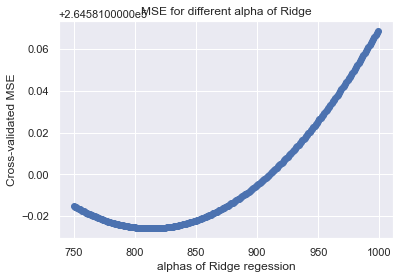

In [192]:
plt.scatter(alph, cv_mse);
plt.title('MSE for different alpha of Ridge')
plt.xlabel('alphas of Ridge regession')
plt.ylabel('Cross-validated MSE')
plt.show()

In [193]:
# Best alpha
best_alpha = regressor.alpha_
print(best_alpha)

813


**Interpretation**
We've determined that the optimum alpha value is 813

In [194]:
RidgeModel = Ridge(alpha=813)

In [195]:
#Fit the model through the data

RidgeModel.fit(X_train_s, y_train)

# Use the model for prediction

y_pred_ridge = RidgeModel.predict(X_test_s)
y_pred_ridge

array([ 576.36510163, 1370.44762984, 1378.48455904, 1518.27141551,
       1756.55058928,  288.27437506, 2348.08154529, 2956.54755358,
       1395.1259392 , 1415.54352767,  672.74361197, 2449.13056478,
       3001.33101171, 1964.99520404,  690.74929319, 1598.36400361,
       1378.86214002, 1605.44289154, 1370.44762984, 1779.48914419,
       1443.63693136, 1395.1259392 , 1638.91541967,  -53.41492357,
       1338.07210891, 1443.63693136, 1534.60035598, 2994.38683451,
       1392.48107296, 1475.05866621,  610.02829725,  -31.23243031,
       2709.12648679, 2487.92788698, 2648.05710641, 1268.27717953,
       1779.48914419, 1629.25697974, 2100.30502059, 1443.63693136,
       1620.54862446, 2326.96312521,   68.67869137, 1779.18236057,
       3079.02956044,  903.66596595,  659.81117124, 1145.38465768,
        -77.45401414, 1647.15875664, 2602.19523568, 1311.96575807,
       1155.50671503,   39.14576111,  -77.45401414, 3597.22003718,
       1482.7401375 , 1664.95803009, 1810.47594043, 1514.65276

In [196]:
# Use regression metrics to evaluate the model

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [197]:
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f'mae ridge: {mae_ridge}, \nmse ridge: {mse_ridge}')

mae ridge: 455.41182115899323, 
mse ridge: 460906.0470495734


**Compare it to baseline**
Compared to our baseline the scores after the ridge regression were much more accurate.

### Explain the regression model

In [198]:
importance_rg = RidgeModel.coef_
importance_rg

array([ 44.19724923, 482.573155  , 562.85787583])

In [199]:
# combine columns with coefficients
columns = X_train.columns
Ridgegraph = pd.Series(importance_rg, columns)
Ridgegraph


age                44.197249
remuneration      482.573155
spending_score    562.857876
dtype: float64

Text(0.5, 1.0, 'Ridge Regression Explanation')

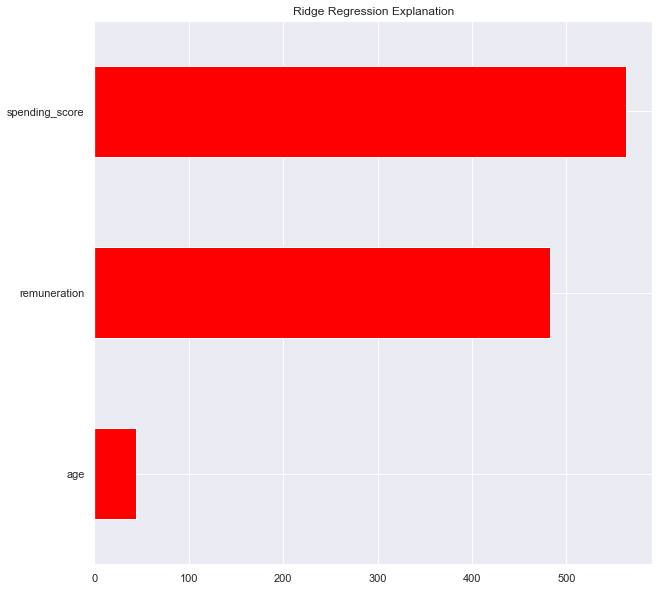

In [200]:
# Visualise the ridge model coefficients

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Set figure size
figure(figsize=(10,10))

Ridgegraph.sort_values().plot.barh(color ='red')

plt.title('Ridge Regression Explanation')


We've checked how spend_score, age and remuneration impact loyalty.  We can tell that spending_score and remuneration have a bigger impact then age.  The model that is the most accurate is a ridge regression model with an alpha of 813.

## 6. Observations and insights

***Your observations here...***






Of the three variables we checked (age, remuneration and spend) spend ($R^{2}$ is at 45%) had the biggest impact on loyalty points.  This is not very good though so need to either remove outliers or do https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

** Come back to**


# 

Ridge regression to improve accuracy and analysis

In [201]:
#Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns

from math import sqrt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor



# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [248]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [205]:
new_reviews_features.head()

,age,remuneration,spending_score
0,18,12.30,39
1,23,12.30,81
2,22,13.12,6
3,25,13.12,77
4,33,13.94,40


In [206]:
new_reviews_features.head()

,age,remuneration,spending_score
0,18,12.30,39
1,23,12.30,81
2,22,13.12,6
3,25,13.12,77
4,33,13.94,40


In [207]:
# Load the CSV file(s).
new_reviews_features.head()
new_reviews_features_k = new_reviews_features

#new_reviews_features_k-means = new_reviews_features

# View DataFrame.
new_reviews_features_k.head()

,age,remuneration,spending_score
0,18,12.30,39
1,23,12.30,81
2,22,13.12,6
3,25,13.12,77
4,33,13.94,40


In [208]:
# Drop unnecessary columns.

new_reviews_features_k.drop(columns=['age'], axis = 1, inplace=True)

# View DataFrame.
new_reviews_features_k.head()


,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [209]:
# Explore the data.
new_reviews_features_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [210]:
# Descriptive statistics.
new_reviews_features_k.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='spending_score', ylabel='remuneration'>

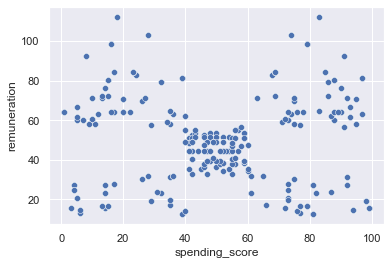

In [211]:
# Create a scatterplot with Seaborn.
sns.scatterplot(data=new_reviews_features_k, x='spending_score', y='remuneration')

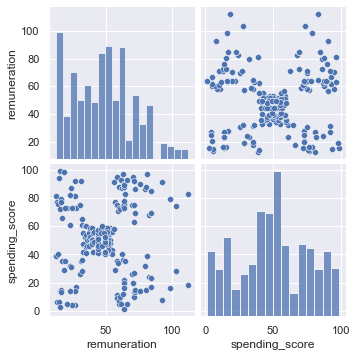

In [212]:
# Create a pairplot with Seaborn.
sns.pairplot(new_reviews_features_k)

## 3. Elbow and silhoutte methods

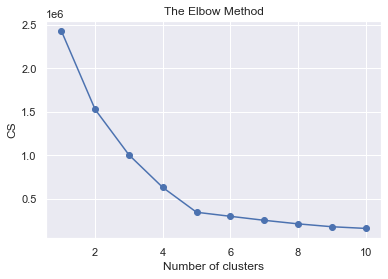

In [213]:
# Determine the number of clusters: Elbow method.
from sklearn.cluster import KMeans

# Elbow chart to determine optimal number of clusters
cs = []

for i in range (1,11):
# Create an object of the KMeans() class    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    # Apply the fit() method with current data set
    kmeans.fit(new_reviews_features_k) 
    cs.append(kmeans.inertia_)
    
plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()


**Interpretation**
According to the elbow method the optimum number of clusters is 5 (The elbow point)

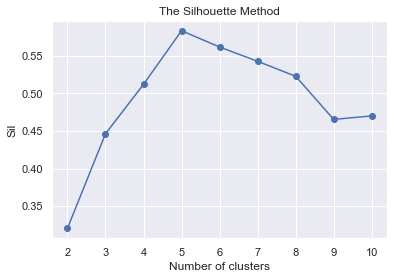

In [214]:
# Determine the number of clusters: Silhouette method.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used
# Create an empty list to store cluster sizes

sil=[]
kmax = 10

for k in range(2, kmax+1): # What does the 2 refer to?
    kmeans_s = KMeans(n_clusters = k).fit(new_reviews_features_k)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(new_reviews_features_k, labels, metric = 'euclidean'))
    

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()


•• Silhouette method confirms a cluster 5 but we will check a couple to be sure. 

## 4. Evaluate k-means model at different values of *k*

### Checking 4 clusters

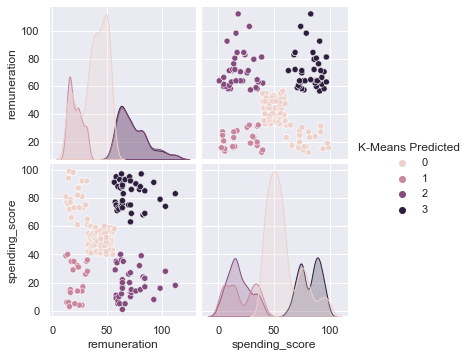

In [215]:
# Check 4 clusters
# Create an object of the KMeans class()
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(new_reviews_features_k)
clusters = kmeans.labels_
new_reviews_features_k['K-Means Predicted'] = clusters

#Plot the predicted
sns.pairplot(new_reviews_features_k, hue='K-Means Predicted', diag_kind='kde')


In [216]:
# Check the number of observations per predicted class.
new_reviews_features_k['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [217]:
# View the K-Means predicted.
print(new_reviews_features_k.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  1


<AxesSubplot:xlabel='spending_score', ylabel='remuneration'>

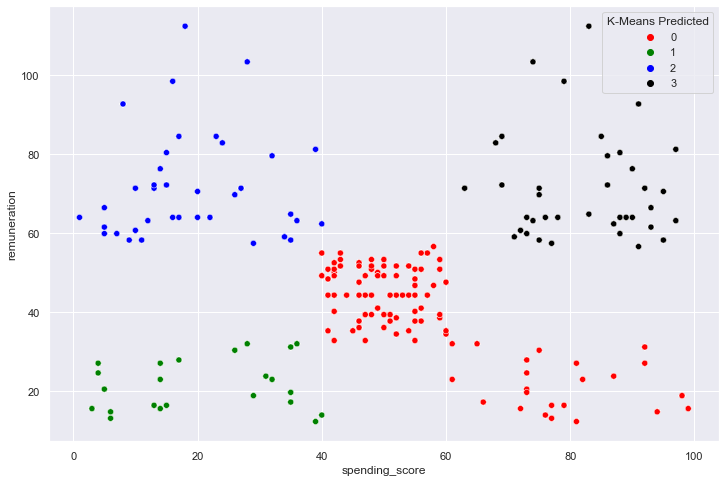

In [218]:
# Visualise clusters with a 2D plot
sns.set(rc={'figure.figsize':(12,8)})

sns.scatterplot(x= 'spending_score',
               y= 'remuneration',
               data=new_reviews_features_k, hue='K-Means Predicted',
               palette=['red', 'green', 'blue', 'black'])

### Evaluate 5 clusters

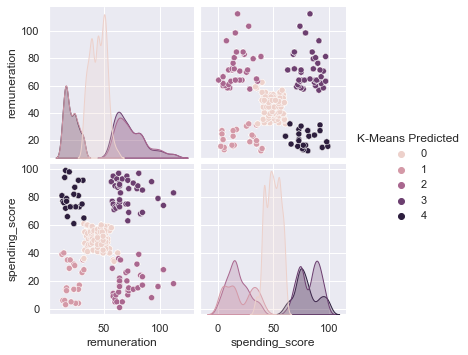

In [219]:
# Check 5 clusters
# Create an object of the KMeans class()
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(new_reviews_features_k)
clusters = kmeans.labels_
new_reviews_features_k['K-Means Predicted'] = clusters

#Plot the predicted
sns.pairplot(new_reviews_features_k, hue='K-Means Predicted', diag_kind='kde')


In [220]:
# Check the number of observations per predicted class.
new_reviews_features_k['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [221]:
# View the K-Means predicted.
print(new_reviews_features_k.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<AxesSubplot:xlabel='spending_score', ylabel='remuneration'>

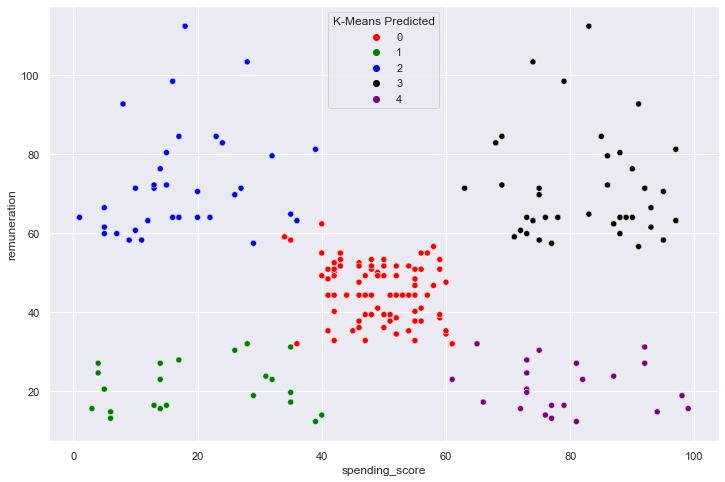

In [222]:
# Visualise clusters with a 2D plot
sns.set(rc={'figure.figsize':(12,8)})

sns.scatterplot(x= 'spending_score',
               y= 'remuneration',
               data=new_reviews_features_k, hue='K-Means Predicted',
               palette=['red', 'green', 'blue', 'black','purple'])

## 7. Discuss: Insights and observations

***Your observations here...***

The distribution of the 5 clusters will be chosen for the models

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [227]:
!pip install wordcloud
!pip install -U textblob

# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm


# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 636 kB 3.8 MB/s eta 0:00:01


In [232]:
# Load the data set as df3.
df3 = new_reviews

# View DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [233]:
# Explore data set.
print(df3.shape)
print(df3.columns)
df3.info

(2000, 9)
Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


<bound method DataFrame.info of       gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                              

In [234]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review','summary']]

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [235]:
# Determine if there are any missing values.
df3.isnull().sum()


review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [236]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View output
df3['review'].head()


0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [237]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df3['summary'].head()


0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [238]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [239]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [241]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates()

# View DataFrame.
df3.shape

(1961, 2)

## 3. Tokenise and create wordclouds

In [243]:
# Create new DataFrame (copy DataFrame).
df4 = df3[['review','summary']]
# View DataFrame.
df4

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


In [245]:
# Apply tokenisation to both columns.

df4['tokens_review']=df4['review'].apply(word_tokenize)
df4['tokens_summary']=df4['summary'].apply(word_tokenize)
# View DataFrame.
df4.head()



,review,summary,tokens_review,tokens_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [246]:
# Review: Create a word cloud.
textt = " ".join(review for review in df4.review)
wordcloud = WordCloud(width = 1600, height = 900,
background_color = 'white',
colormap = 'plasma',
stopwords = 'none',
min_font_size = 10).generate(textt)


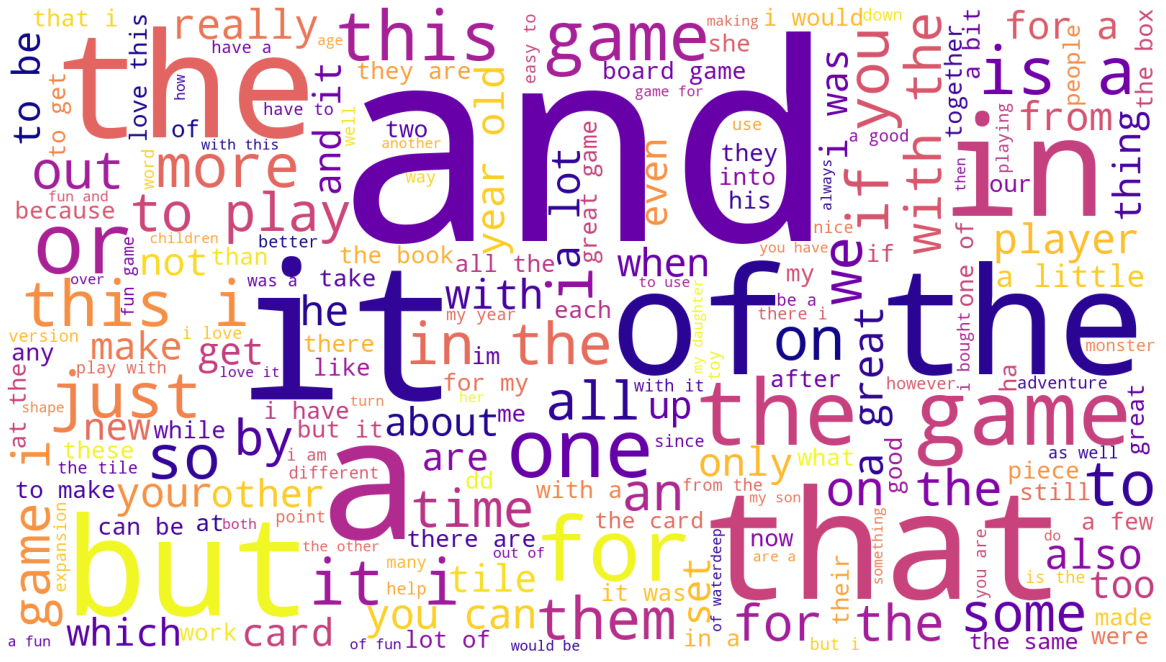

KeyError: 94

In [249]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16,9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

all_tokens =[]
for i in range(df4.shape[0]):
    all_tokens = all_tokens + df4['tokens_review'][i]


In [252]:
# Summary: Create a word cloud.

textt = " ".join(review for review in df4.summary)
wordcloud = WordCloud(width = 1600, height = 900,
background_color = 'white',
colormap = 'plasma',
stopwords = 'none',
min_font_size = 10).generate(textt)


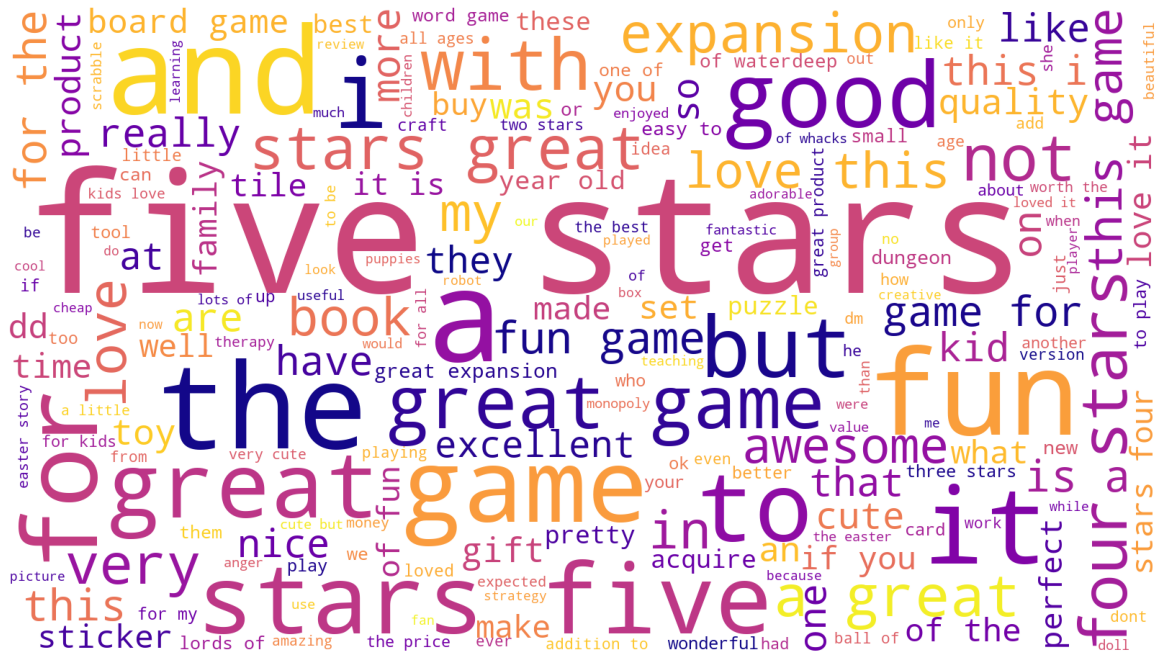

KeyError: 94

In [253]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16,9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

all_tokens =[]
for i in range(df4.shape[0]):
    all_tokens = all_tokens + df4['tokens_summary'][i]

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [255]:
# Determine the frequency distribution.
all_tokens
fdist = FreqDist(all_tokens)


### 4b) Remove alphanumeric characters and stopwords

In [256]:
# Delete all the alpanum.
tokens1 = [word for word in all_tokens if word.isalnum()]


In [261]:
# Remove all the stopwords
english_stopwords = set(stopwords.words('english'))
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]
tokens2_string = ''
for value in tokens2:
    tokens2_string = tokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [262]:
# Create a wordcloud without stop words.

wordcloud = WordCloud(width = 1600, height = 900,
background_color = 'white',
colormap = 'plasma',
stopwords = 'none',
min_font_size = 5).generate(tokens2_string)


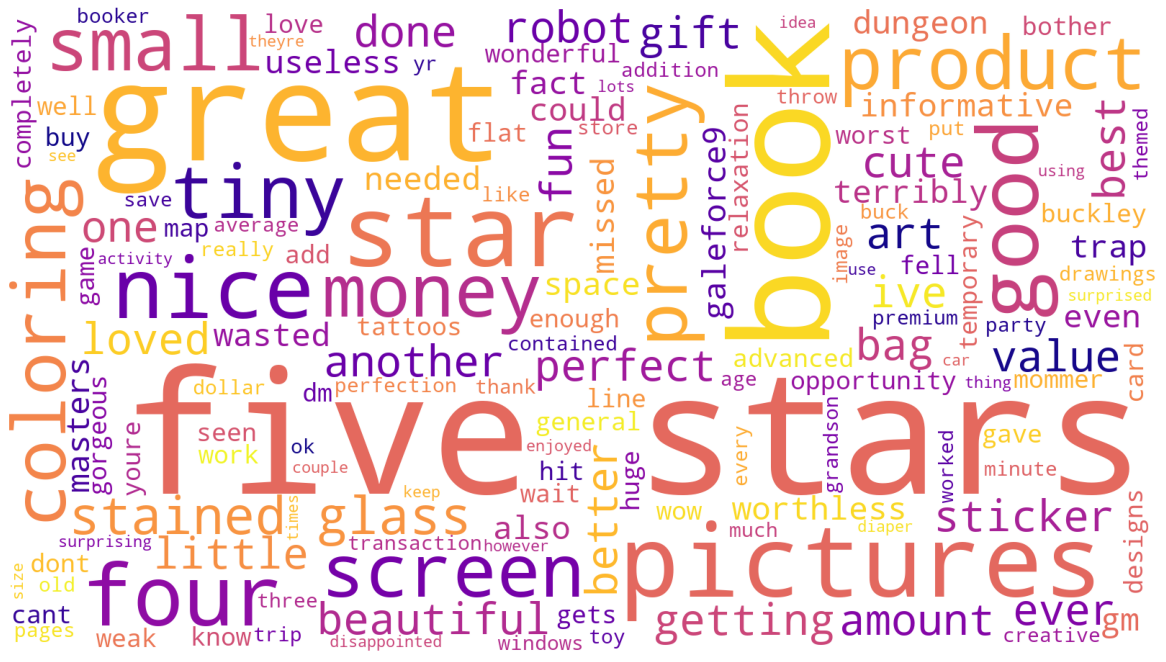

FreqDist({'stars': 26, 'five': 21, 'a': 15, 'great': 13, 'book': 13, 'the': 9, 'this': 8, 'to': 7, 'of': 6, 'pictures': 6, ...})

In [263]:
# Plot the wordcloud image.
plt.figure(figsize = (16,9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

fdist1 = FreqDist(tokens2)
fdist


### 4d) Identify 15 most common words and polarity

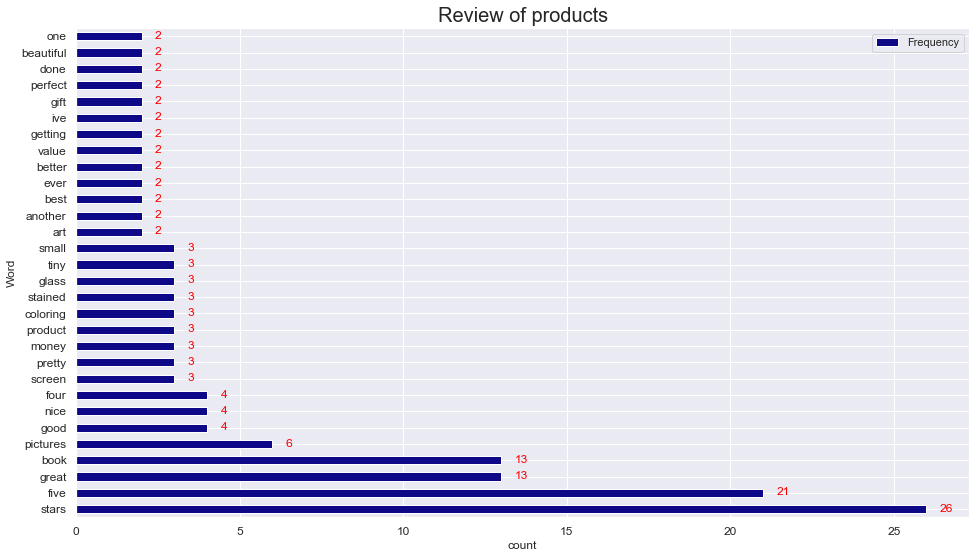

In [275]:
'''top 15 commonly used words across the reviews.'''
# Determine the 15 most common words.
# Generate DF out of counter
counts = pd.DataFrame(Counter(tokens2).most_common(30),
columns=['Word', 'Frequency']).set_index('Word')


ax = counts.plot(kind='barh', figsize=(16,9), fontsize = 12, colormap ='plasma')
ax.set_xlabel("count", fontsize=12)
ax.set_ylabel("Word", fontsize=12)
ax.set_title("Review of products", fontsize = 20)
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()),
                                                       2)), fontsize = 12, color='red')


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [277]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [280]:
# Determine polarity of both columns. 

df4['polarity_review'] = df4['review'].apply(generate_polarity)
df4['polarity_summary'] = df4['summary'].apply(generate_polarity)
# View output.
df4.head()

,review,summary,tokens_review,tokens_summary,polarity_review,polarity_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00


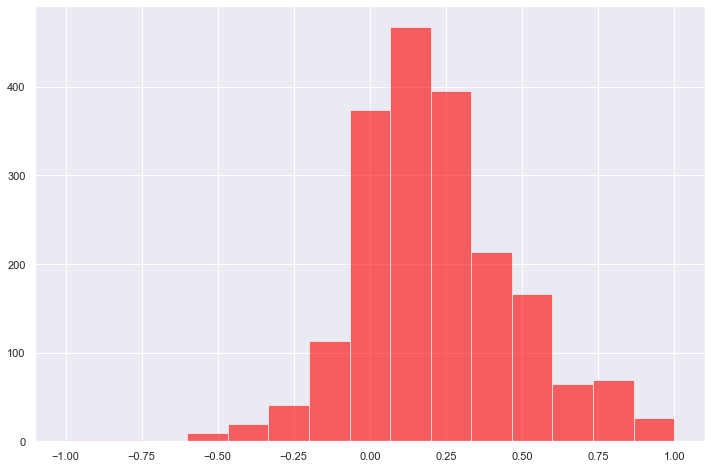

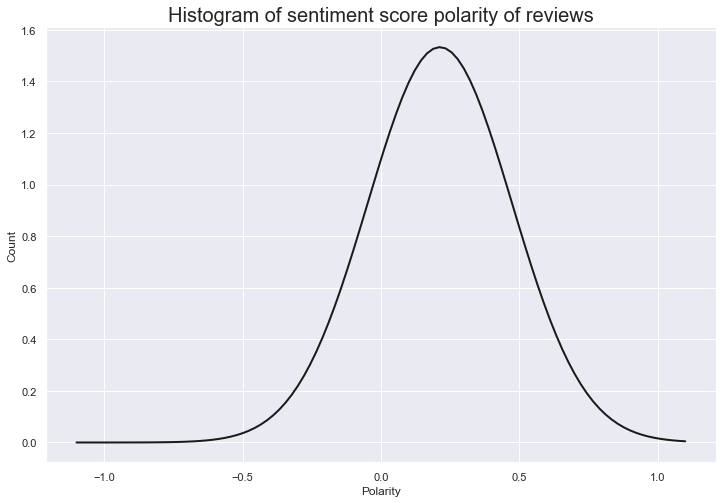

In [282]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15
plt.hist(df4['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Histogram of sentiment score
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df4['polarity_review'])
p = norm.pdf(x, mu, std)
plt.figure(figsize = (12,8))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Histogram of sentiment score polarity of reviews', fontsize = 20)
plt.show()


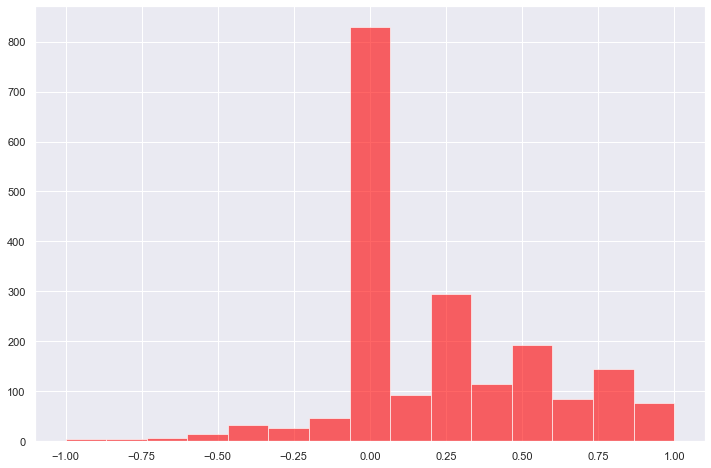

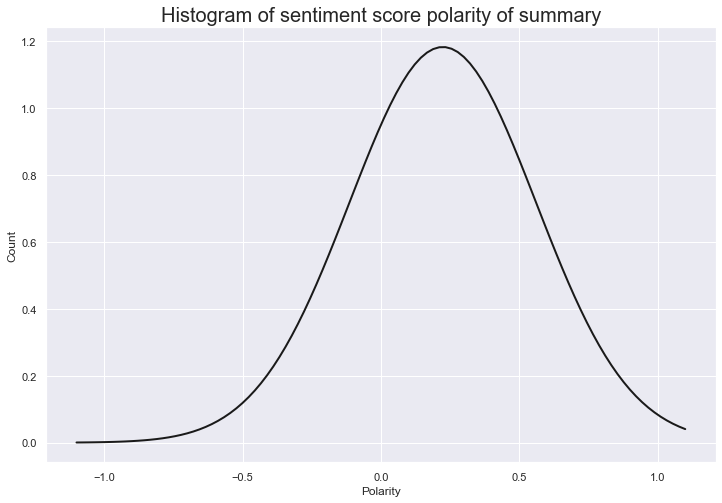

In [283]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15
plt.hist(df4['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Histogram of sentiment score
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df4['polarity_summary'])
p = norm.pdf(x, mu, std)
plt.figure(figsize = (12,8))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Histogram of sentiment score polarity of summary', fontsize = 20)
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [289]:
# Top 20 negative reviews.
negative_sentiment_reivew = df4.nsmallest(20, 'polarity_review')
negative_sentiment_reivew_fin = negative_sentiment_reivew[['review', 'polarity_review']]
negative_sentiment_reivew_fin.style.set_properties(subset=['review'], **{'width' : '1200px'})

# View output.
print(negative_sentiment_reivew_fin)

                                                 review  polarity_review
208   booo unles you are patient know how to measure...        -1.000000
182                   incomplete kit very disappointing        -0.780000
1804  im sorry i just find this product to be boring...        -0.583333
364   one of my staff will be using this game soon s...        -0.550000
117   i bought this as a christmas gift for my grand...        -0.500000
227   this was a gift for my daughter i found it dif...        -0.500000
230                    i found the directions difficult        -0.500000
290              instructions are complicated to follow        -0.500000
301                                           difficult        -0.500000
1524                         expensive for what you get        -0.500000
174   i sent this product to my granddaughter the po...        -0.491667
347   my 8 yearold granddaughter and i were very fru...        -0.446250
538   i purchased this on the recommendation of two

In [290]:
# Top 20 positive summaries.
positive_sentiment_reivew = df4.nlargest(20, 'polarity_review')
positive_sentiment_reivew_fin = positive_sentiment_reivew[['review', 'polarity_review']]
positive_sentiment_reivew_fin.style.set_properties(subset=['review'], **{'width' : '1200px'})

# View output.
print(positive_sentiment_reivew_fin)

# View output.


                                                 review  polarity_review
7                             came in perfect condition              1.0
165                                        awesome book              1.0
194                                        awesome gift              1.0
496   excellent activity for teaching selfmanagement...              1.0
524                         perfect just what i ordered              1.0
591                                   wonderful product              1.0
609                                  delightful product              1.0
621   wonderful for my grandson to learn the resurre...              1.0
790                                             perfect              1.0
933                                             awesome              1.0
1135                                        awesome set              1.0
1168               best set buy 2 if you have the means              1.0
1177               awesome addition to my rpg gm sy

## 7. Discuss: Insights and observations

***Your observations here...***

Turtle Games requested that we analyse their social media reviews so that they can use the analysis to inform marketing campaigns.  We selected word clouds because they are visually engaging and easily draw attention to the most frequently used words.  Polarity reviews and NLP indicate that sentiment for Turtle Games is more positive than negative. Top 20 positive and negative reviews were extracted which will assist in prioritise areas to im

# 